In [6]:
from glob import glob
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [7]:
#Required for Binder to work
try:
    wd = os.path.dirname(os.path.realpath(__file__))
except:
    wd = os.getcwd()

# 2. Bowen ratio
The data needed for the Bowen ratio calculation is in an excel sheet:

In [8]:
df = pd.read_excel(wd+'/br_data/1may2018_dry_wet.xls', skiprows=[1])
df.index = pd.to_datetime(df.TIMESTAMP)

Let's do the calculation and plot the Bowen ratio

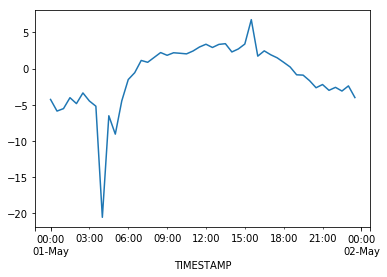

In [9]:
gamma = 0.066 #kpa/K

es_tw46 = 0.61*np.exp(19.9*df.Tw46 / (df.Tw46+273))
es_tw38 = 0.61*np.exp(19.9*df.Tw38 / (df.Tw38+273))

ea_46   = es_tw46 - gamma  * (df.T46 - df.Tw46)
ea_38   = es_tw38 - gamma  * (df.T38 - df.Tw38)

BR = gamma * (df.T46 - df.T38) / (ea_46 - ea_38)

BR.plot()


Now let's calculate the fluxes from this. We can estimate the ground heat flux (and other storage fluxes) with ~10-20% of the net radiation. This does introduce errors however.

(-200, 500)

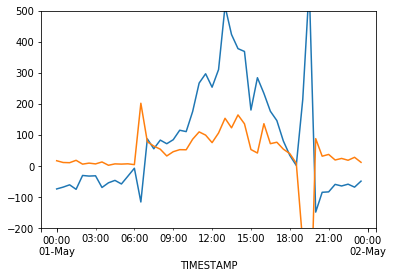

In [10]:
#Approximating the ground heat flux:
G = 0.15 * df.Rn

H  = (df.Rn-G) / (1+1/BR)
LE = (df.Rn-G) / (BR+1)

H.plot()
LE.plot()
plt.ylim([-200,500])

As can be seen in the plot, there is a big spike at around 8pm. These kind of errors can be due to the BR approaching -1.
This will cause small uncertainties to blow up as the denominator of the H and LE equations approaches 0.

# EddyPro comparison


Text(0,0.5,'$\\beta$')

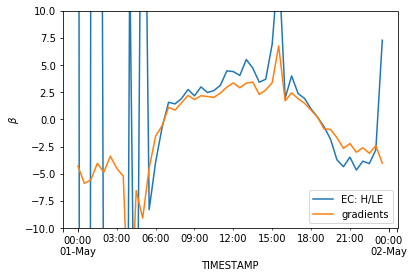

In [11]:
df_eddypro = pd.read_excel(wd+'/eddypro_data/eddypro_output.xls', header=[0], skiprows=[1])

df_eddypro.index = pd.to_datetime(df_eddypro.datetime)

(df_eddypro.H / df_eddypro.LE).plot(label='EC: H/LE')
BR.plot(label='gradients')
plt.legend(loc='best')
plt.ylim([-10,10])
plt.ylabel(r'$\beta$')